# 5 minutes intro to IPython for ROOT users

In this notebook we show how to use inside IPython __ROOT__ (C++ library, de-facto standard in High Energy Physics).

This notebook is aimed to help __ROOT__ users.

Working using ROOT-way loops is very slow in python and in most cases useless.

You're proposed to use `root_numpy` &mdash; a very convenient python library to operate with ROOT (`root_numpy` is included in REP docker image, but it is installed quite easily).

### Allowing inline plots

In [1]:
%matplotlib inline

## Creating ROOT file using root_numpy

There are two libraries to work with ROOT files

* rootpy http://www.rootpy.org - direct wrapper to ROOT methods.
* root_numpy http://rootpy.github.io/root_numpy/ - new-style, efficient and simple library to deal with ROOT files from python

Let's show how to use the second library.

In [2]:
import numpy
import root_numpy
# generating random data
data = numpy.random.normal(size=[10000, 2])
# adding names of columns
data = data.view([('first', float), ('second', float)])
# saving to file
root_numpy.array2root(data, filename='./toy_datasets/random.root', treename='tree', mode='recreate')

In [3]:
!ls ./toy_datasets

MiniBooNE_PID.txt README.md         magic04.data      random.root       wget-log


## Add column to the ROOT file using root_numpy

In [4]:
from rootpy.io import root_open
with root_open('./toy_datasets/random.root', mode='a') as myfile:
    new_column = numpy.array(numpy.ones([10000, 1]) , dtype=[('new', 'f8')])
    root_numpy.array2tree(new_column, tree=myfile.tree)
    myfile.write()

In [5]:
root_numpy.root2array('./toy_datasets/random.root', treename='tree')

array([(-0.7293706390084891, -0.6434950644122529),
       (0.9144554461677479, 0.18204403981590392),
       (1.4880249632214615, 1.0750267248542769), ...,
       (0.8314923070439978, -0.18743518192156958),
       (0.43746295194683626, -0.3003532169872483),
       (0.8587695590082538, 0.17430817995134756)], 
      dtype=[('first', '<f8'), ('second', '<f8')])

# Plot function using ROOT

pay attention that `canvas` is on the last line. This is an output value of cell.

When IPython cell return canvas, it is automatically drawn

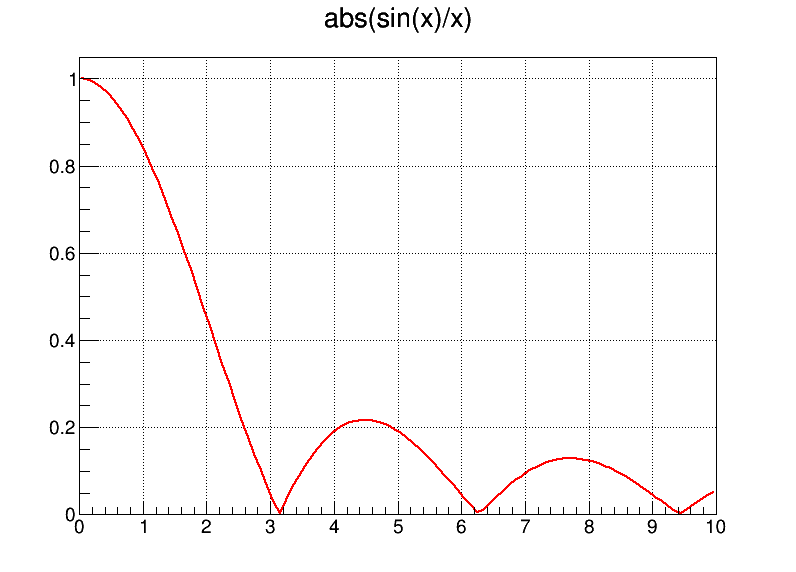

In [6]:
import ROOT
from rep.plotting import canvas
canvas = canvas('my_canvas')
function1 = ROOT.TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
canvas.SetGridx()
canvas.SetGridy()
function1.Draw()
# Drawing output (last line is considered as output of cell)
canvas

# Plot histogram using ROOT for branch in root file

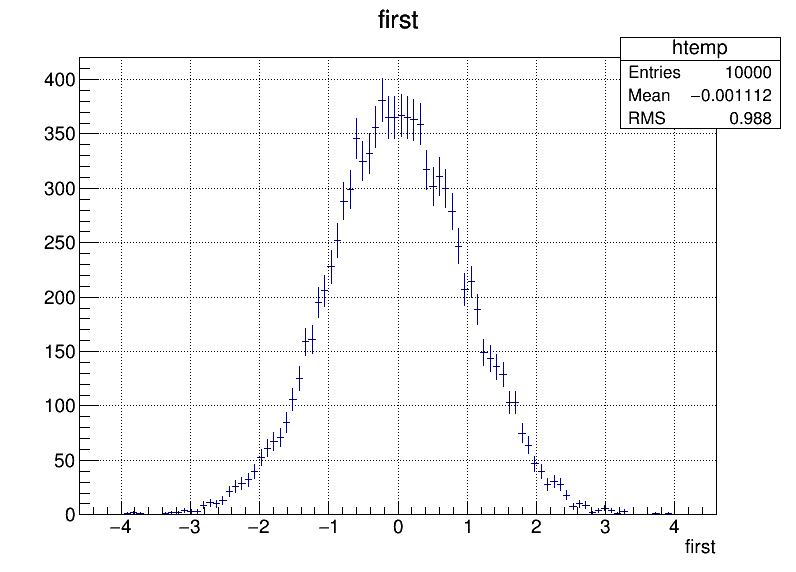

In [7]:
File = ROOT.TFile("toy_datasets/random.root")
Tree = File.Get("tree")
Tree.Draw("first")
canvas

## use histogram settings

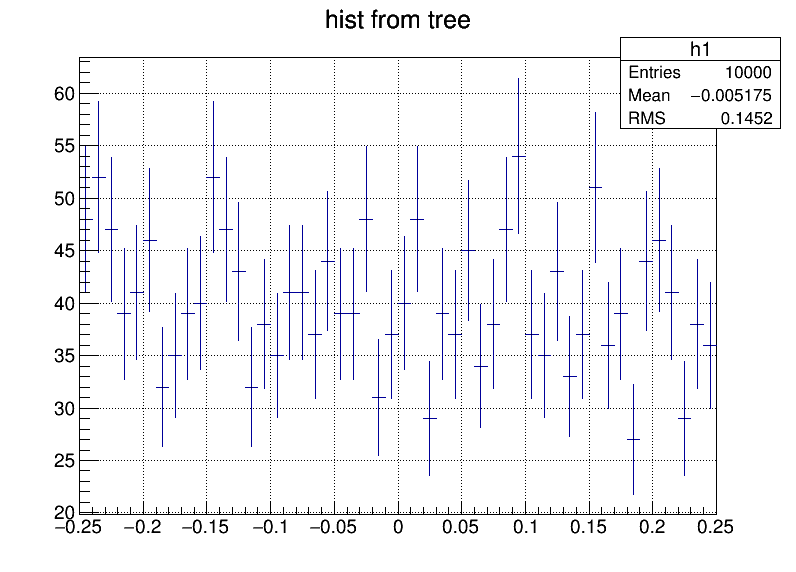

In [8]:
# we need to keep histogram in any variable, otherwise it will be deleted automatically
h1 = ROOT.TH1F("h1","hist from tree",50, -0.25, 0.25)
Tree.Draw("first>>h1")
canvas

# root_numpy + ipython way

But IPython provides it's own plotting / data manipulation techniques. Brief demostration below.

Pay attention that there is column-expression which is evaluated on-the-fly.

In [9]:
data = root_numpy.root2array("toy_datasets/random.root", 
                             treename='tree', 
                             branches=['first', 'second', 'sin(first) * exp(second)'], 
                             selection='first > 0')

__in the example above__ we selected three branches (one of which is an expression and was computed on-the-fly) and selections

In [10]:
# taking, i.e. first 10 elements using python slicing:
data2 = data[:10]

### Convert to pandas

pandas allows easy manipulations with data.

In [11]:
import pandas
dataframe = pandas.DataFrame(data)
# looking at first elements
dataframe.head()

,first,second,sin(first) * exp(second)
0,0.914455,0.182044,0.950413
1,1.488025,1.075027,2.920040
2,0.104062,-0.600626,0.056972
3,0.947616,-1.385899,0.203087
4,2.528759,1.408811,2.353142


In [12]:
# taking elements, that satisfy some condition, again showing only first
dataframe[dataframe['second'] > 0].head()

,first,second,sin(first) * exp(second)
0,0.914455,0.182044,0.950413
1,1.488025,1.075027,2.920040
4,2.528759,1.408811,2.353142
7,0.248552,1.790109,1.473571
8,0.248634,2.085482,1.980567


In [13]:
# adding new column as result of some operation
dataframe['third'] = dataframe['first'] +  dataframe['second'] 
dataframe.head()

,first,second,sin(first) * exp(second),third
0,0.914455,0.182044,0.950413,1.096499
1,1.488025,1.075027,2.920040,2.563052
2,0.104062,-0.600626,0.056972,-0.496564
3,0.947616,-1.385899,0.203087,-0.438283
4,2.528759,1.408811,2.353142,3.937570


## Histograms in python

Default library for plotting in python is matplotlib.

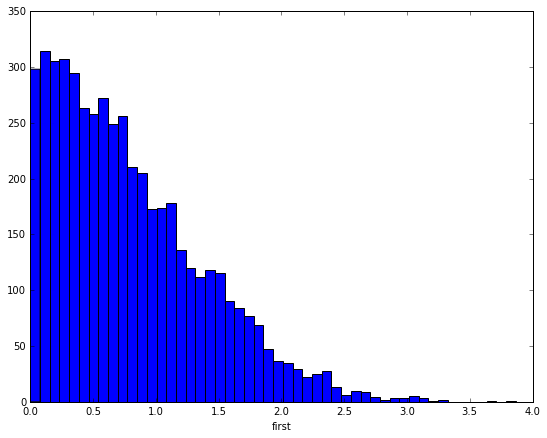

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.hist(data['first'], bins=50)
plt.xlabel('first')

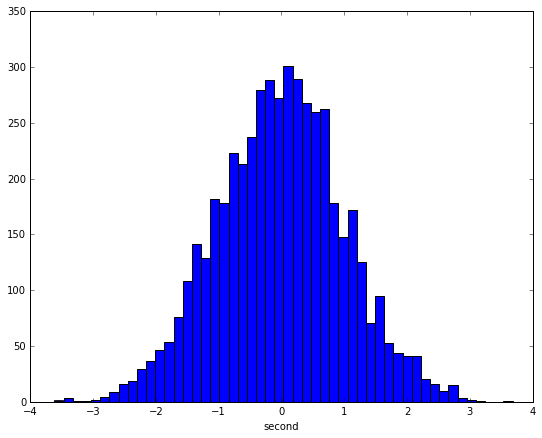

In [15]:
plt.figure(figsize=(9, 7))
plt.hist(data['second'], bins=50)
plt.xlabel('second')

## Summary

- you can work in standard way with ROOT (by using rootpy), but it is slow
- you can benefit serously from python tools (those are fast and very flexible):
  - matplotlib for plotting
  - numpy / pandas for manipating arrays/dataframes
- to deal with ROOT files, you can use `root_numpy` as a very nice bridge between two worlds.